## install the einops package

In [1]:
! pip install einops

In [2]:
from einops import rearrange, reduce
from utils import display_np_arrays_as_images


display_np_arrays_as_images()

## randomly generated mosaic masks

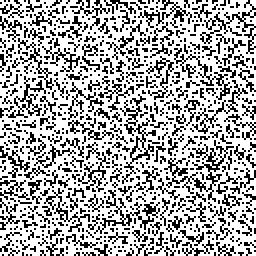

In [4]:
import numpy as np
from utils import gen_mask


k_list = [2,4,8,16]
n = 3
im_size = 256

Ms_generator = gen_mask.gen_mask(k_list, n, im_size)

Ms = next(Ms_generator)
Ms[0]

## image I 

12


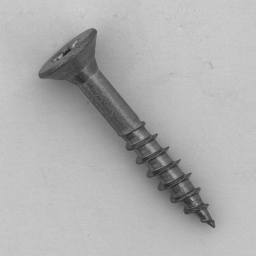

In [6]:
from PIL import Image


im = np.array(Image.open('./screw_sample_0.png').convert('L'))/255.
im_ = [im * m for m in Ms]
print(len(im_))
im_ = np.array(im_)

im

## same as the Figure 2 in the paper

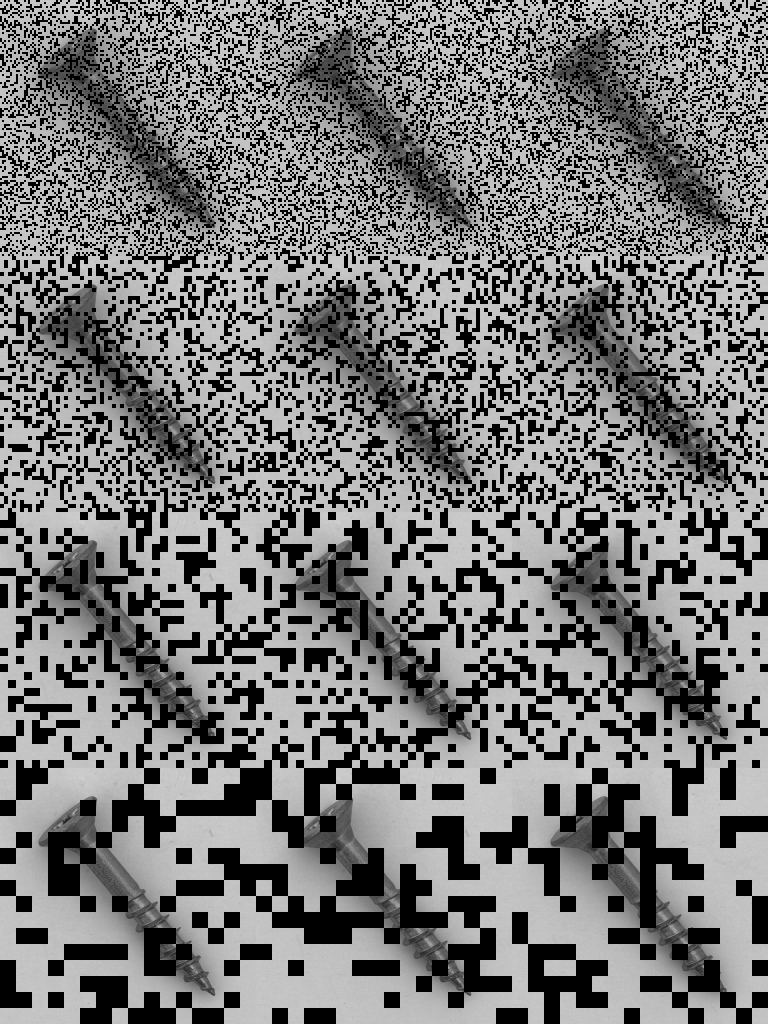

In [7]:
rearrange(im_, '(b1 b2) h w -> (b1 h) (b2 w) ', b1=4)

## re-assembled images

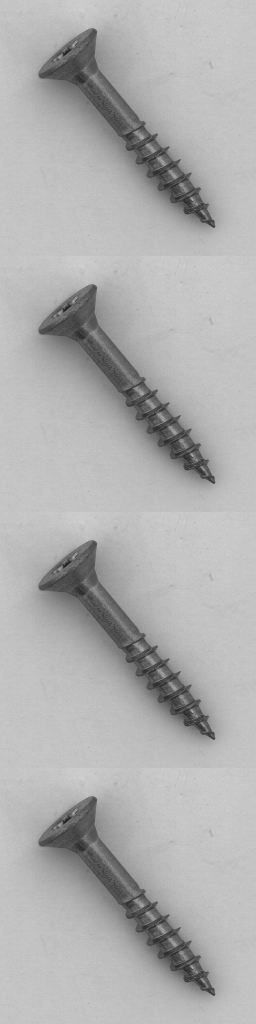

In [9]:
reduce(im_, '(b1 b2) h w -> (b1 h) w', 'sum', b1=4)/2